In [67]:
import pandas as pd
import numpy as np
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

In [48]:
# 表示行数の説明
pd.set_option("display.max_rows", 1000)

In [54]:
# データの読み込み
with open('try_data.pickle', mode='rb') as f:
    data = pickle.load(f)

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
#なぜか、さきにdatetimeというカラムを作成しておかないと、うまく作動しない。
data['datetime'] = 1

In [57]:
#サンプリングの時間をdatetime型に変換
for i  in range(len(data)):
    if  data['サンプリング'][i] != 'サンプリング':
        data['datetime'][i] = datetime.strptime(data['サンプリング'][i], '%Y/%m/%d %H:%M:%S')

In [59]:
#日本語が入っている行を削除
#dataの型の変換前に削除をしてしまうと、変換がうまくいかないので、注意。
data = data[data['A-SOC(％)'] != 'A-SOC(％)']

In [60]:
#時系列データをインデックスにセットし直す
data = data.set_index(data['datetime'])

In [61]:
data

,index,サンプリング,車速(km),電池総電圧(V),電流(A),ODOメータ値(km),A-SOC(％),セル内最高温度(℃),セル内最低温度(℃),サービスプラグ近傍温度(℃),datetime
datetime,,,,,,,,,,,
2013-04-01 09:35:16,60,2013/04/01 09:35:16,10,340.9,-0.95,4376,43,8,8,8,2013-04-01 09:35:16
2013-04-01 09:36:16,120,2013/04/01 09:36:16,0,341.1,-0.36,4376,43,8,8,8,2013-04-01 09:36:16
2013-04-01 09:37:16,180,2013/04/01 09:37:16,0,340.8,-0.63,4376,42.5,8,8,8,2013-04-01 09:37:16
2013-04-01 09:38:16,240,2013/04/01 09:38:16,22,333.4,-39.12,4376,42.5,8,8,8,2013-04-01 09:38:16
2013-04-01 09:39:16,300,2013/04/01 09:39:16,0,340.1,-0.63,4377,42,9,8,8,2013-04-01 09:39:16
2013-04-01 09:40:16,360,2013/04/01 09:40:16,0,340.1,-0.63,4377,42,9,8,8,2013-04-01 09:40:16
2013-04-01 09:41:16,420,2013/04/01 09:41:16,0,339.2,-2.78,4377,41.5,9,8,8,2013-04-01 09:41:16
2013-04-01 09:42:16,480,2013/04/01 09:42:16,0,339.5,-0.72,4377,41.5,9,8,8,2013-04-01 09:42:16
2013-04-01 09:43:16,540,2013/04/01 09:43:16,0,339.1,-0.63,4377,41,9,8,8,2013-04-01 09:43:16


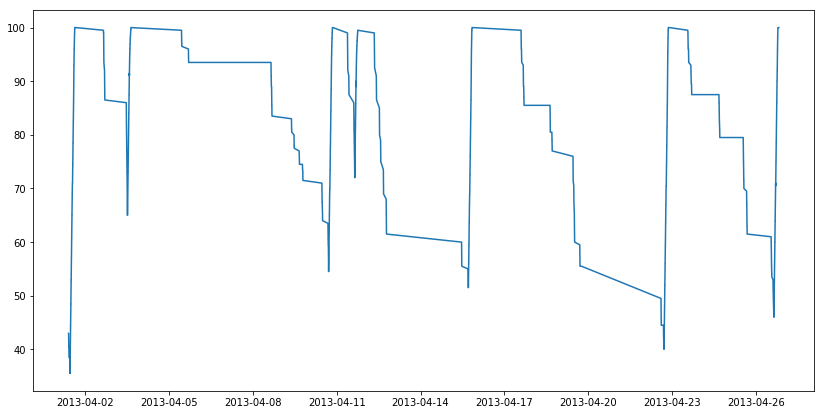

In [65]:
fig = plt.subplots(figsize=(14,7))
plt.plot(data.index, data["A-SOC(％)"])
#plt.xlim([data_num.index[0], data_num.index[550]])
plt.show()

1kw=1L(ガソリン)→１０km
iMievの基本仕様確認

２４時間単位で走行頻度を分布
何時の時間帯に充電したいか、充電頻度
走行パターン：１回の走行時間、平均距離、最大走行距離
残しておきたいSOCの量の推測：最大航続距離、充電タイミングの残SOC量平均
充電スタンドの配置・距離感
微妙な斜めの走行はなんなのか

新しいドライバクラスタ

普通充電：８時間　
急速充電：20分　30%→90%



EVドライバーの特性の列挙→機械学習へ
EVユーザが喜ぶサービスの提案
例）5,6月の充電費用をタダにする（系統の電気が余っているので）

In [119]:
# fig = plt.subplots(figsize=(14,7))
# plt.scatter(data_num.index, data_num["A-SOC(％)"])
# #plt.xlim([data_num.index[0], data_num.index[550]])
# plt.show()

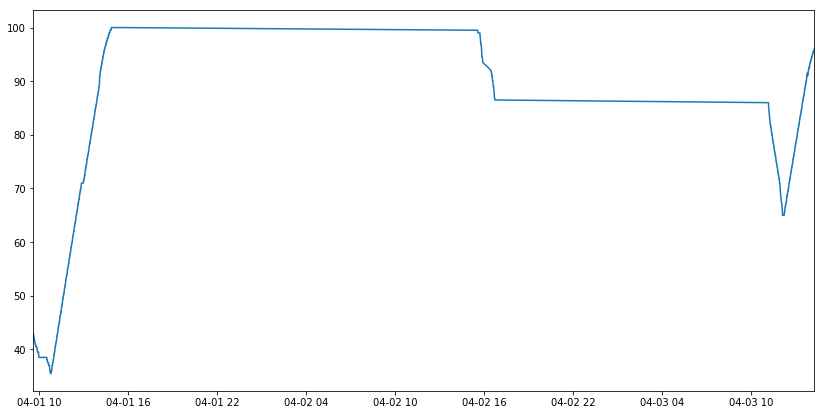

In [66]:
fig = plt.subplots(figsize=(14,7))
plt.plot(data.index, data["A-SOC(％)"])
plt.xlim([data.index[0], data.index[550]])
plt.show()

In [70]:
data.index

DatetimeIndex(['2013-04-01 09:35:16', '2013-04-01 09:36:16',
               '2013-04-01 09:37:16', '2013-04-01 09:38:16',
               '2013-04-01 09:39:16', '2013-04-01 09:40:16',
               '2013-04-01 09:41:16', '2013-04-01 09:42:16',
               '2013-04-01 09:43:16', '2013-04-01 09:44:16',
               ...
               '2013-04-26 19:38:54', '2013-04-26 19:41:08',
               '2013-04-26 19:42:08', '2013-04-26 19:43:08',
               '2013-04-26 19:44:08', '2013-04-26 19:45:08',
               '2013-04-26 19:46:08', '2013-04-26 19:47:08',
               '2013-04-26 19:48:08', '2013-04-26 19:49:08'],
              dtype='datetime64[ns]', name='datetime', length=2613, freq=None)

In [71]:
type(data)

pandas.core.frame.DataFrame

In [116]:
data['20130401']

,index,サンプリング,車速(km),電池総電圧(V),電流(A),ODOメータ値(km),A-SOC(％),セル内最高温度(℃),セル内最低温度(℃),サービスプラグ近傍温度(℃),datetime,diff_SOC
datetime,,,,,,,,,,,,
2013-04-01 09:35:16,60,2013/04/01 09:35:16,10,340.9,-0.95,4376,43,8,8,8,2013-04-01 09:35:16,-1.0
2013-04-01 09:36:16,120,2013/04/01 09:36:16,0,341.1,-0.36,4376,43,8,8,8,2013-04-01 09:36:16,-1.5
2013-04-01 09:37:16,180,2013/04/01 09:37:16,0,340.8,-0.63,4376,42.5,8,8,8,2013-04-01 09:37:16,-1.0
2013-04-01 09:38:16,240,2013/04/01 09:38:16,22,333.4,-39.12,4376,42.5,8,8,8,2013-04-01 09:38:16,-1.5
2013-04-01 09:39:16,300,2013/04/01 09:39:16,0,340.1,-0.63,4377,42,9,8,8,2013-04-01 09:39:16,-1.0
2013-04-01 09:40:16,360,2013/04/01 09:40:16,0,340.1,-0.63,4377,42,9,8,8,2013-04-01 09:40:16,-1.0
2013-04-01 09:41:16,420,2013/04/01 09:41:16,0,339.2,-2.78,4377,41.5,9,8,8,2013-04-01 09:41:16,-1.0
2013-04-01 09:42:16,480,2013/04/01 09:42:16,0,339.5,-0.72,4377,41.5,9,8,8,2013-04-01 09:42:16,-1.0
2013-04-01 09:43:16,540,2013/04/01 09:43:16,0,339.1,-0.63,4377,41,9,8,8,2013-04-01 09:43:16,-0.5


In [87]:
data['%s'%20130401]

,index,サンプリング,車速(km),電池総電圧(V),電流(A),ODOメータ値(km),A-SOC(％),セル内最高温度(℃),セル内最低温度(℃),サービスプラグ近傍温度(℃),datetime
datetime,,,,,,,,,,,
2013-04-01 09:35:16,60,2013/04/01 09:35:16,10,340.9,-0.95,4376,43,8,8,8,2013-04-01 09:35:16
2013-04-01 09:36:16,120,2013/04/01 09:36:16,0,341.1,-0.36,4376,43,8,8,8,2013-04-01 09:36:16
2013-04-01 09:37:16,180,2013/04/01 09:37:16,0,340.8,-0.63,4376,42.5,8,8,8,2013-04-01 09:37:16
2013-04-01 09:38:16,240,2013/04/01 09:38:16,22,333.4,-39.12,4376,42.5,8,8,8,2013-04-01 09:38:16
2013-04-01 09:39:16,300,2013/04/01 09:39:16,0,340.1,-0.63,4377,42,9,8,8,2013-04-01 09:39:16
2013-04-01 09:40:16,360,2013/04/01 09:40:16,0,340.1,-0.63,4377,42,9,8,8,2013-04-01 09:40:16
2013-04-01 09:41:16,420,2013/04/01 09:41:16,0,339.2,-2.78,4377,41.5,9,8,8,2013-04-01 09:41:16
2013-04-01 09:42:16,480,2013/04/01 09:42:16,0,339.5,-0.72,4377,41.5,9,8,8,2013-04-01 09:42:16
2013-04-01 09:43:16,540,2013/04/01 09:43:16,0,339.1,-0.63,4377,41,9,8,8,2013-04-01 09:43:16


In [84]:
exp_data = data

In [107]:
len(exp_data)

2613

In [92]:
type(exp_data['A-SOC(％)'][2])

float

In [105]:
for i, row in enumerate(exp_data):
    if i < len(exp_data) - 5:
        exp_data['diff_SOC'][i] = exp_data['A-SOC(％)'][i+5] - exp_data['A-SOC(％)'][i]
    else:
        exp_data['diff_SOC'][i] = 0

In [106]:
exp_data

,index,サンプリング,車速(km),電池総電圧(V),電流(A),ODOメータ値(km),A-SOC(％),セル内最高温度(℃),セル内最低温度(℃),サービスプラグ近傍温度(℃),datetime,diff_SOC
datetime,,,,,,,,,,,,
2013-04-01 09:35:16,60,2013/04/01 09:35:16,10,340.9,-0.95,4376,43,8,8,8,2013-04-01 09:35:16,-1.0
2013-04-01 09:36:16,120,2013/04/01 09:36:16,0,341.1,-0.36,4376,43,8,8,8,2013-04-01 09:36:16,-1.5
2013-04-01 09:37:16,180,2013/04/01 09:37:16,0,340.8,-0.63,4376,42.5,8,8,8,2013-04-01 09:37:16,-1.0
2013-04-01 09:38:16,240,2013/04/01 09:38:16,22,333.4,-39.12,4376,42.5,8,8,8,2013-04-01 09:38:16,-1.5
2013-04-01 09:39:16,300,2013/04/01 09:39:16,0,340.1,-0.63,4377,42,9,8,8,2013-04-01 09:39:16,-1.0
2013-04-01 09:40:16,360,2013/04/01 09:40:16,0,340.1,-0.63,4377,42,9,8,8,2013-04-01 09:40:16,-1.0
2013-04-01 09:41:16,420,2013/04/01 09:41:16,0,339.2,-2.78,4377,41.5,9,8,8,2013-04-01 09:41:16,-1.0
2013-04-01 09:42:16,480,2013/04/01 09:42:16,0,339.5,-0.72,4377,41.5,9,8,8,2013-04-01 09:42:16,-1.0
2013-04-01 09:43:16,540,2013/04/01 09:43:16,0,339.1,-0.63,4377,41,9,8,8,2013-04-01 09:43:16,-0.5


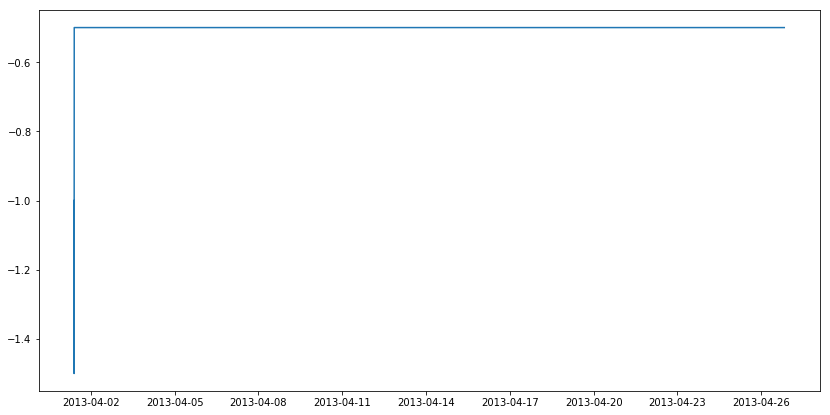

In [110]:
fig = plt.subplots(figsize=(14,7))
plt.plot(data.index, exp_data["diff_SOC"])
#plt.xlim([data.index[0], data.index[500]])
plt.show()

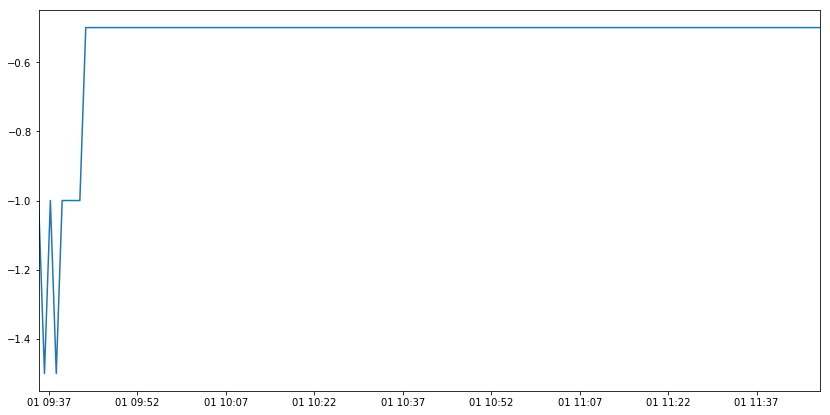

In [111]:
fig = plt.subplots(figsize=(14,7))
plt.plot(data.index, exp_data["diff_SOC"])
plt.xlim([data.index[0], data.index[100]])
plt.show()

In [121]:
tmp_data = exp_data['20130415']

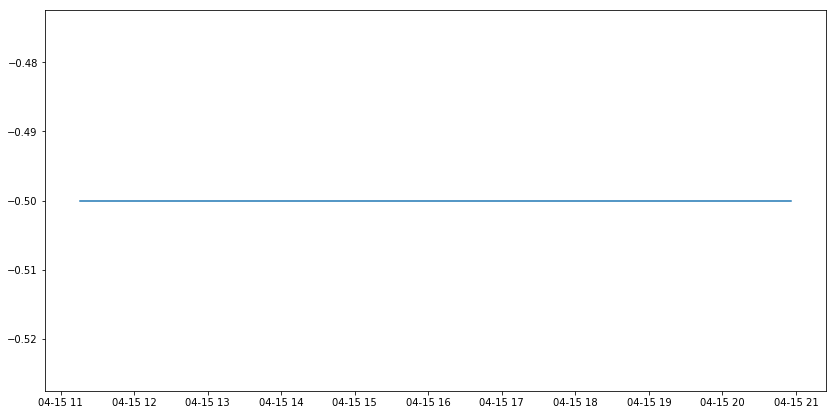

In [122]:
fig = plt.subplots(figsize=(14,7))
plt.plot(tmp_data.index, tmp_data["diff_SOC"])
#plt.xlim([data.index[0], data.index[500]])
plt.show()

日ごとに図を出せるコードを書きたい。（１ヶ月30日分のデータが1日づつ３０枚出るやつ。）

In [123]:
tmp_date = datetime(2013, 4, 1)

In [126]:
tmp_date

datetime.datetime(2013, 4, 1, 0, 0)

In [134]:
tmp_date.strftime('%Y-%m-%d')

'2013-04-01'

In [137]:
exp_data[tmp_date.strftime('%Y-%m-%d')]

,index,サンプリング,車速(km),電池総電圧(V),電流(A),ODOメータ値(km),A-SOC(％),セル内最高温度(℃),セル内最低温度(℃),サービスプラグ近傍温度(℃),datetime,diff_SOC
datetime,,,,,,,,,,,,
2013-04-01 09:35:16,60,2013/04/01 09:35:16,10,340.9,-0.95,4376,43,8,8,8,2013-04-01 09:35:16,-1.0
2013-04-01 09:36:16,120,2013/04/01 09:36:16,0,341.1,-0.36,4376,43,8,8,8,2013-04-01 09:36:16,-1.5
2013-04-01 09:37:16,180,2013/04/01 09:37:16,0,340.8,-0.63,4376,42.5,8,8,8,2013-04-01 09:37:16,-1.0
2013-04-01 09:38:16,240,2013/04/01 09:38:16,22,333.4,-39.12,4376,42.5,8,8,8,2013-04-01 09:38:16,-1.5
2013-04-01 09:39:16,300,2013/04/01 09:39:16,0,340.1,-0.63,4377,42,9,8,8,2013-04-01 09:39:16,-1.0
2013-04-01 09:40:16,360,2013/04/01 09:40:16,0,340.1,-0.63,4377,42,9,8,8,2013-04-01 09:40:16,-1.0
2013-04-01 09:41:16,420,2013/04/01 09:41:16,0,339.2,-2.78,4377,41.5,9,8,8,2013-04-01 09:41:16,-1.0
2013-04-01 09:42:16,480,2013/04/01 09:42:16,0,339.5,-0.72,4377,41.5,9,8,8,2013-04-01 09:42:16,-1.0
2013-04-01 09:43:16,540,2013/04/01 09:43:16,0,339.1,-0.63,4377,41,9,8,8,2013-04-01 09:43:16,-0.5


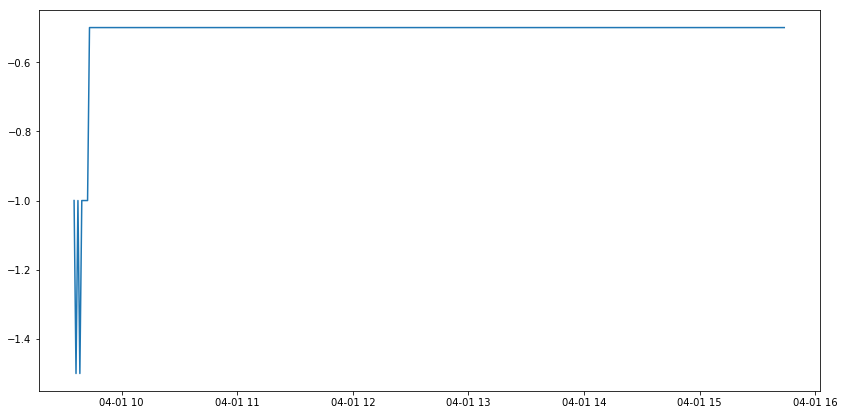

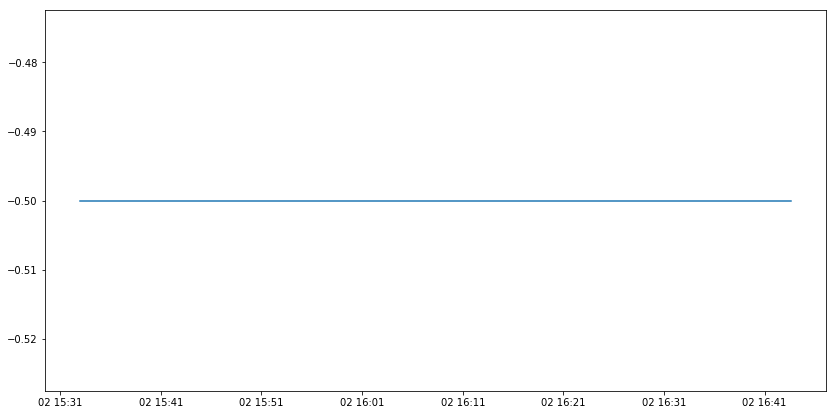

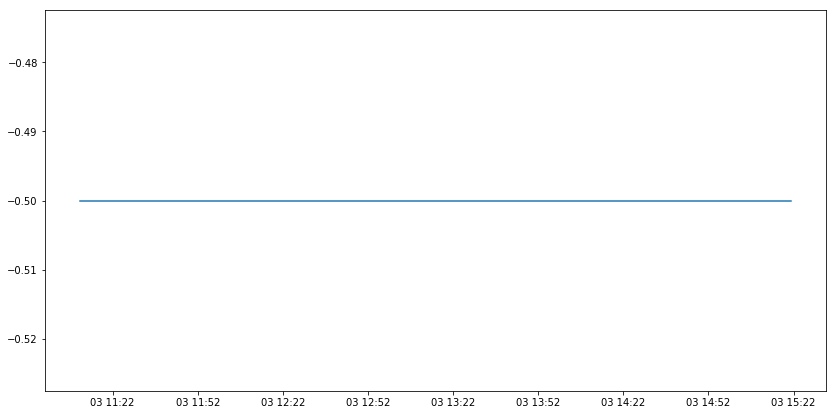

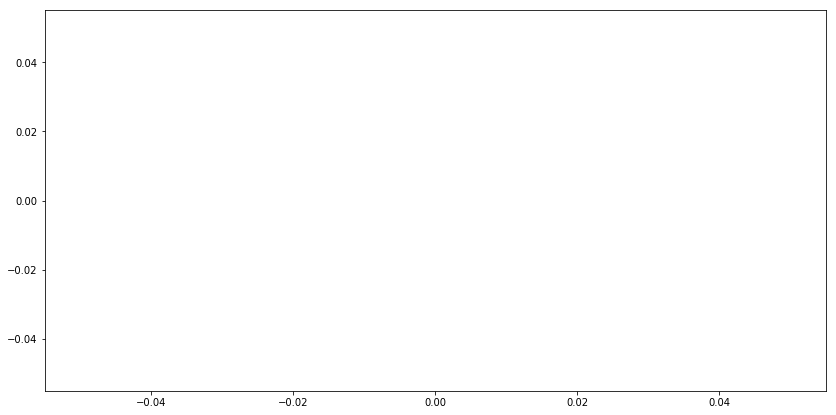

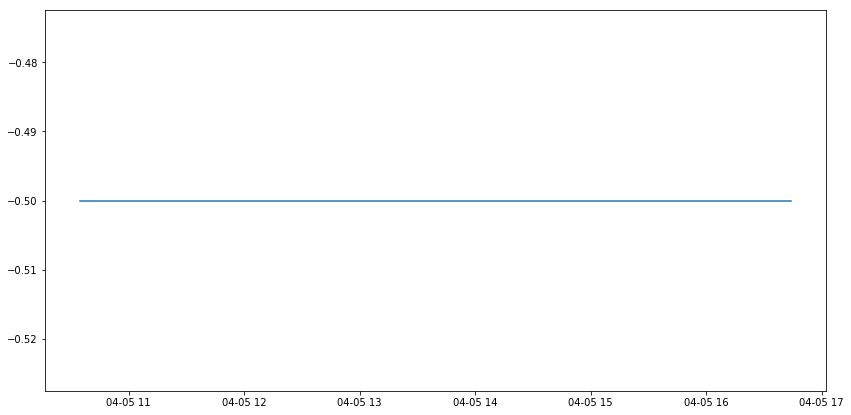

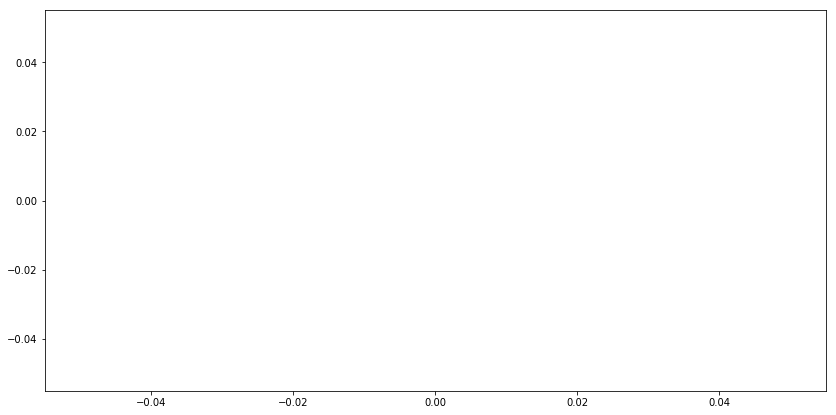

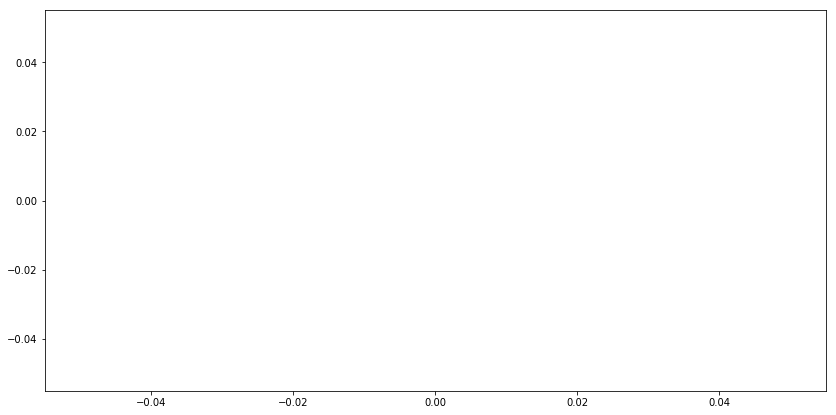

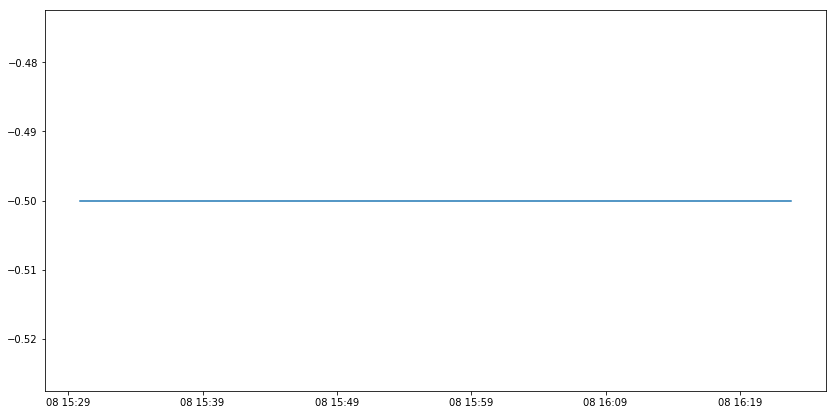

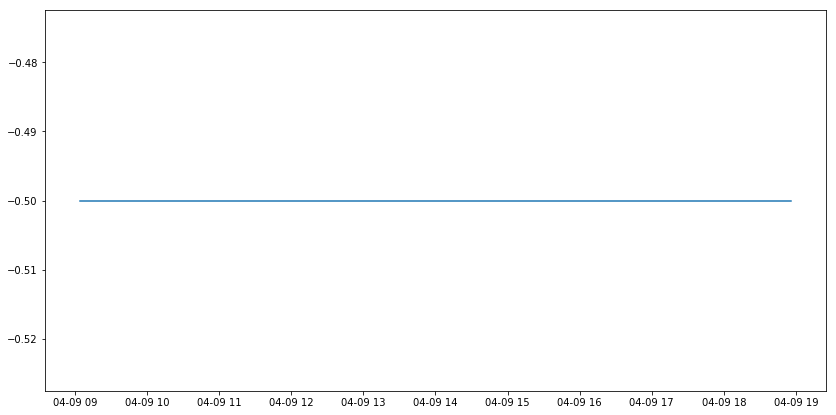

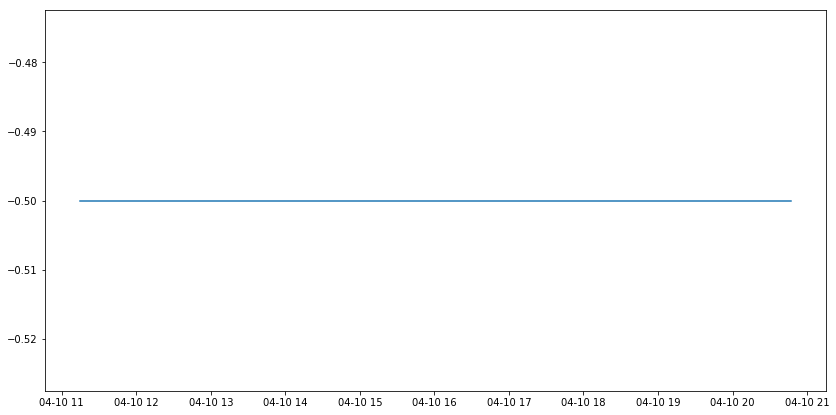

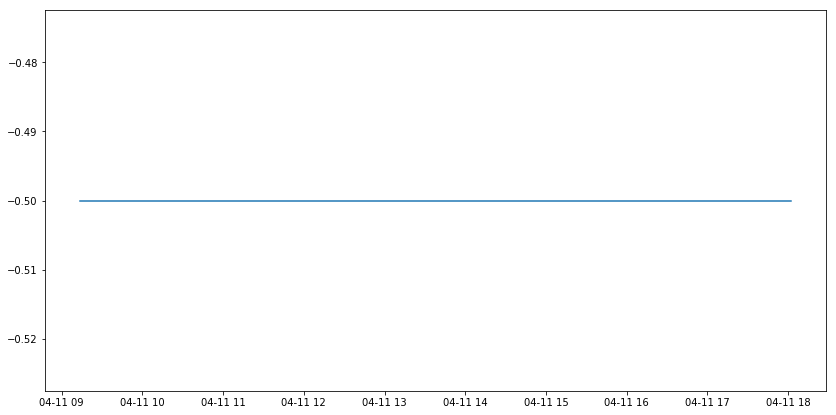

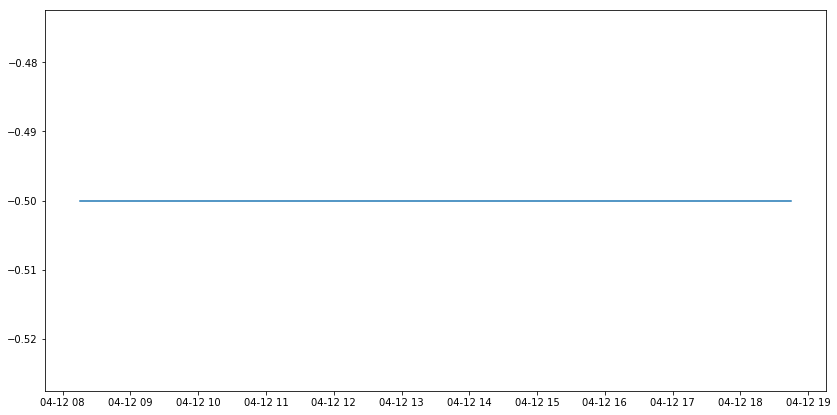

In [139]:
for i, row in enumerate(exp_data):
    tmp_date = datetime(2013, 4, i + 1)
    tmp_data = exp_data[tmp_date.strftime('%Y-%m-%d')]
    fig = plt.subplots(figsize=(14,7))
    plt.plot(tmp_data.index, tmp_data["diff_SOC"])
    #plt.xlim([data.index[0], data.index[500]])
    plt.show()